<a href="https://colab.research.google.com/github/AishaEvering/ML_Models_From_Scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression From Scratch

## Load Data

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [86]:
# get data
df = datasets.load_breast_cancer()
X, y = df.data, df.target
len(X), len(y)

(569, 569)

In [87]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((455, 30), (455,))

In [88]:
np.unique(y_train)

array([0, 1])

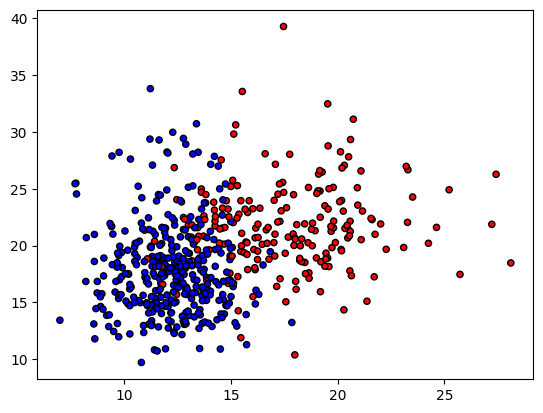

In [89]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

## Create Logisitic Regression Function

### Equations

<u>Linear Equation</u>
<br><small>provides continuous variables</small>

$$
f(w, b) =wx+b
$$

<u>Sigmoid Equation</u>
<br><small>used to model probability between 0 and 1</small>

$$
s(x) = \frac{1}{1 + e^{-x}}
$$

<u>Linear + Sigmoid</u>

$$
\widehat{y}= \frac{1}{1 + e^{-wx+b}}
$$


<small>
* $w$ = weight = slope<br>
* $b$ = bias = intercept<br>
* $x$ = weight value index<br>
* $\widehat{y}$ = predicted y
</small>
<br><br>
------------------------------------------------------------
<br>

<u>Calculate Derivatives</u>

*with respect to $w$*

$$dw = \frac{1}{N}\displaystyle\sum_{i=1}^n{x}_i(\widehat{y} - {y}_i)$$

*with respect to $b$*

$$db = \frac{1}{N}\displaystyle\sum_{i=1}^n(\widehat{y} - {y}_i)$$

<small>
* $N$ = number of samples<br>
* $x$ = weight<br>
* $\widehat{y}$ = predicted label<br>
* $y$ = label<br>
* $i$ = weight/label value index<br>
* $dw$ = derivative with respect to $w$<br>
* $db$ = derivative with respect to $b$<br>
</small>

------------------------------------------------------------
<br>

<u>Update Rules</u>

*new weight*
$$
w = w - a \times dw
$$
*new bias*
$$
b = b - a \times db
$$

<small>
* $w$ = weight = slope<br>
* $b$ = bias = intercept<br>
* $dw$ = derivative with respect to $w$<br>
* $db$ = derivative with respect to $b$<br>
* $a$ = alpha = learning rate
</small>

In [99]:
class LogisticRegression():
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

    def fit(self, X, y):
      # init parameters
      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)
      self.bias = 0

      # gradient descent
      for _ in range(self.n_iters):

        # get predicted
        linear_model = self._linear(X, self.weights, self.bias)
        y_predicted = self._sigmoid(linear_model)

        # derivative with respect to w
        dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))

        # derivative with respect to b
        db = (1/n_samples) * np.sum(y_predicted - y)

        # update weights and bias
        self._update(dw, db)

  def predict(self, X):
    linear_model = self._linear(X, self.weights, self.bias)
    y_predicted = self._sigmoid(linear_model)

    y_predicted_classes = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_classes, y_predicted

  def _update(self, dw, db):
    # update rules: new weight
    self.weights -= self.lr * dw

    # update rules: new bias
    self.bias -= self.lr * db

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-np.float128(x)))

  def _linear(self, X, w, b):
    return np.dot(X, w) + b

## Binary Cross-Entropy

**Cost/Loss Function**

Cross-Entropy<br>
*A measure of how different two probability distributions are from each other.
 The lower the cross-entropy, the more similar the distributions are.*

$$
\text{BCE} = -\frac{1}{N} \sum_{i=1}^{n} [{y}_ilog\widehat{y}_i + (1 - {y_i}) log(1 - \widehat{y}_i)]
$$

<small>
* $n$ = number of samples<br>
* $i$ = weight/label value index<br>
* $\widehat{y}$ = predicted label<br>
* $y$ = label<br>
</small>

In [91]:
def binary_cross_entropy(y_true, y_pred):
  # keep the array of values within a certain range
  y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

  # (1−𝑦𝑖)𝑙𝑜𝑔(1−𝑦ˆ𝑖)
  term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)

  # 𝑦𝑖𝑙𝑜𝑔𝑦ˆ𝑖
  term_1 = y_true * np.log(y_pred + 1e-7)

  return -np.mean(term_0+term_1, axis=0)

## Fit, Train, and Predict

In [92]:
# predict something
model_0 = LogisticRegression(lr=0.001, n_iters=1000)
model_0.fit(X_train, y_train)
predictions, pred_probs = model_0.predict(X_test)

In [93]:
print(f'LR classification accuracy: {accuracy(y_test, predictions)}')

LR classification accuracy: 0.9473684210526315


## Plot Predictions

0.5824950996575437279


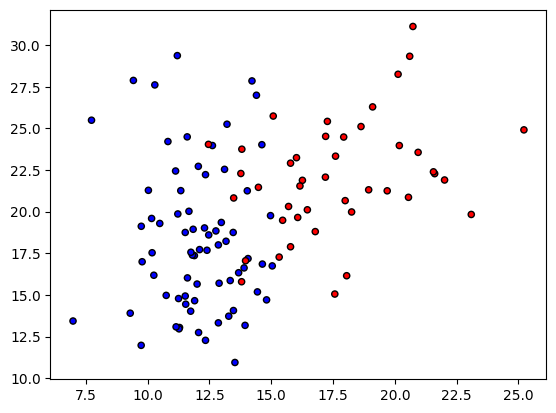

In [96]:
print(binary_cross_entropy(y_test, pred_probs))
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, edgecolors='k', s=20)
plt.show()

0.5824950996575437279


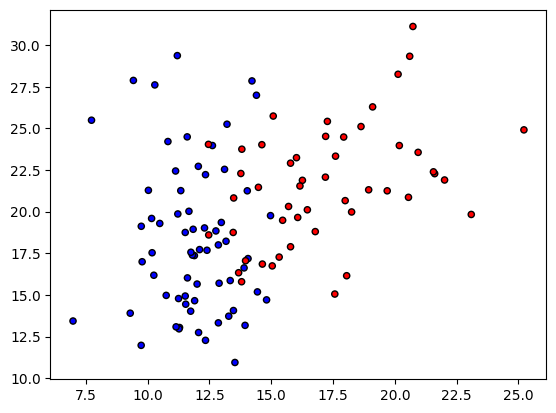

In [95]:
print(binary_cross_entropy(y_test, pred_probs))
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cmap, edgecolors='k', s=20)
plt.show()